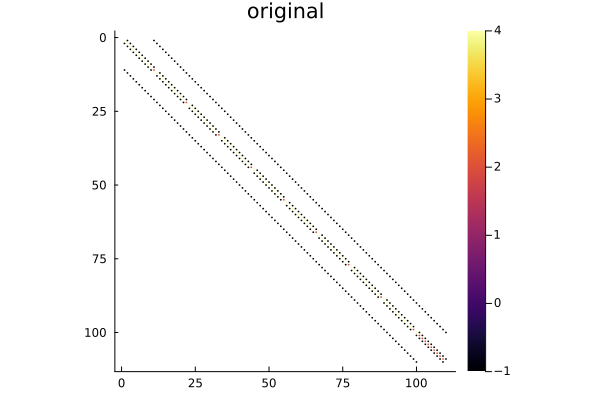

In [1]:
# ChatGPT wrote this basedon the prompt
# I'm teaching a class in computational optimization that wants a demo of sparse direct methods. Can you come up with a fun Julia example to show off a sparse lu or cholesky factorization. Maybe throw in a few spy plots to illustrate the sparsity patterns of the factors and the fill in? 

using SparseArrays
using LinearAlgebra
using SuiteSparse
using Plots

# Create a 2D finite difference Laplacian matrix on an n x n grid

function poisson_2d(n)
    e = ones(n)
    T = spdiagm(-1 => -e, 0 => 2e, 1 => -e)
    I = spdiagm(0 => ones(n))
    return kron(I, T) + kron(T, I)
end

# Visualize the sparsity pattern
function spyplot(A, title_str)
    spy(A, markersize=1)
    title!(title_str)
end

n = 10            # Grid size, gives n^2 x n^2 matrix
A = poisson_2d(n)  # Sparse symmetric positive definite matrix

spyplot(A, "original")

In [2]:
# Cholesky factorization
F = cholesky(A + I)
L = F.L

SparseArrays.CHOLMOD.FactorComponent{Float64, :L, Int64}
type:    LLt
method:  simplicial
maxnnz:  783
nnz:     783
success: true


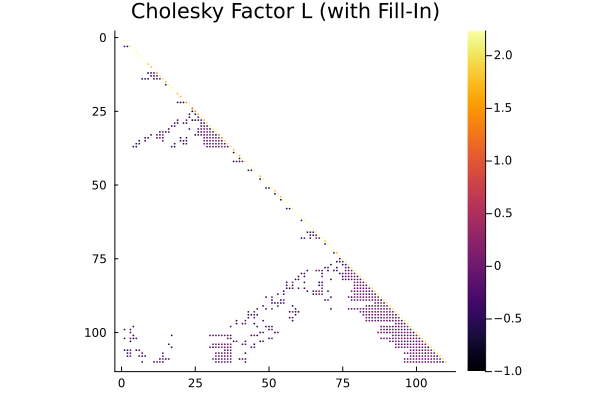

In [3]:
spyplot(sparse(L), "Cholesky Factor L (with Fill-In)")

In [4]:
# LU factorization (non-symmetric version for fun)
    A_nonsym = copy(A)
    A_nonsym[1, end] = 0.1  # Break symmetry
    F_lu = lu(A_nonsym)

    # Show LU factors
    plot(layout=(1,2), size=(800,400))
    plot!(1, spy(sparse(F_lu.L), markersize=1), title="LU Factor L")
    plot!(2, spy(sparse(F_lu.U), markersize=1), title="LU Factor U")

LoadError: MethodError: no method matching getindex(::Nothing, ::Int64)
The function `getindex` exists, but no method is defined for this combination of argument types.

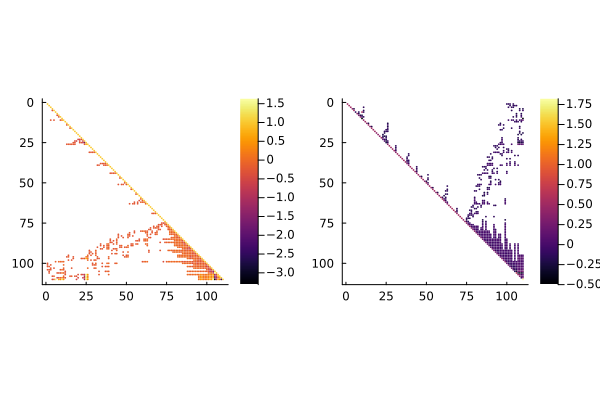

In [5]:
plot(spy(sparse(F_lu.L)), spy(sparse(F_lu.U)))

In [6]:
Abad = sprand(150,150,0.05)

150×150 SparseMatrixCSC{Float64, Int64} with 1125 stored entries:
⎡⠄⣀⠆⡁⠠⠀⠤⠀⠸⠀⠈⠈⠃⠀⢠⢀⠢⡀⡀⡂⠀⠠⠀⡒⢀⡁⢀⡔⠂⠀⠁⠐⠄⠐⠠⠆⠄⠁⠀⡂⎤
⎢⢀⠀⠂⢄⠀⠤⠢⠀⠀⠀⢄⡂⠀⠁⢍⠈⢀⠆⡀⡀⢅⠂⢀⠑⠀⠠⣀⠌⠀⠢⢀⡄⠀⠨⠠⢀⡤⠠⡈⡈⎥
⎢⠂⠁⡲⠁⠅⠀⠈⠈⡀⠐⠀⢀⠐⠀⠁⠀⡀⠠⠖⠀⠈⠀⠀⡀⠄⠀⡂⠠⢀⠂⠁⠈⠀⢐⠂⠁⢄⡈⠆⠀⎥
⎢⠂⠀⢠⠀⡂⠨⣀⠠⣌⢀⠁⠄⠕⠀⠄⣀⢂⡊⠀⠀⠀⠈⠐⡙⢁⠉⡣⡐⠁⠠⠀⠀⠑⠀⠠⢡⣀⠁⡁⠠⎥
⎢⠀⢒⠠⡁⡂⢂⠀⠀⡆⠃⠑⡁⡀⠨⡀⡂⢈⠅⢂⡑⠀⠀⢐⢀⠀⠨⠀⠁⠠⠀⡔⠀⡀⡆⠀⠀⠀⠰⠈⠑⎥
⎢⢠⠀⡁⠤⠈⢂⠐⠠⠀⢐⣀⠀⠨⠠⡅⠈⠐⠨⢄⠈⡀⡂⢄⠑⢆⣀⡀⠀⠀⠀⡄⠤⠀⠀⢢⠨⡂⠕⠈⠁⎥
⎢⠀⠈⠀⠄⠀⡀⠈⡆⠀⢘⠂⠁⠁⠀⡉⠐⡀⠂⠀⡀⠀⡨⠠⢊⡀⢀⡈⡀⣐⡰⡄⡠⠀⠀⡀⠀⠀⠠⡒⠆⎥
⎢⠀⠀⡈⠀⡒⠈⡖⠢⣁⠄⠄⠂⡀⠀⠃⢆⠀⠈⠔⠀⠂⢀⠈⣀⠀⢀⠀⠄⠣⢀⠂⠨⢀⠤⠰⢀⠈⠄⢠⠂⎥
⎢⠈⢩⠐⠈⠃⠂⠠⡕⠄⠀⠅⢀⠂⠀⢘⠀⠐⢀⠀⠤⡁⠀⠀⠀⠀⠀⠎⠠⠜⢈⠠⠨⠀⠃⠔⠐⠢⠐⡁⠐⎥
⎢⢀⢈⠢⠁⡇⢭⠓⠀⡀⠀⠂⡐⣈⠀⠠⠔⢠⠂⠀⣀⡐⡄⡈⠊⡂⠨⠀⠀⠠⡀⡐⠈⣐⡀⢁⠐⠃⠉⠘⠕⎥
⎢⠂⡁⠀⢀⡀⢀⠐⢌⡁⡀⠀⠙⠐⠁⡠⢀⠀⡁⢀⠴⠐⠂⢐⠒⠁⣀⡨⡀⠐⠊⠠⠀⠂⠢⠘⠹⡡⠄⠀⠁⎥
⎢⠀⡠⢂⠀⠀⠀⠰⡠⡄⠀⡰⠓⣰⠔⢀⠀⠀⠂⠂⠂⠂⠁⠄⢐⠀⢄⠂⠄⡀⠄⠂⠖⢄⡐⠶⠁⠀⠒⢀⠀⎥
⎢⠈⠐⠀⢌⠀⢂⢈⢈⢉⠠⠄⡂⠁⡠⠂⠠⡰⠁⡘⠐⠂⠁⠀⣇⠀⠀⠄⠀⠃⠀⠄⠀⠀⠆⠈⢚⠄⢉⡠⠀⎥
⎢⡄⠀⠀⠅⠠⠂⠠⣄⠀⠤⠠⠄⢁⠀⠀⠀⢁⠀⠈⢑⢈⠀⣀⡈⠀⠈⡀⢉⠖⠐⠐⠈⠀⠀⠀⡈⠈⢀⠁⠀⎥
⎢⠀⣀⡦⠐⠡⠩⠀⠀⣁⢀⠂⠥⢄⢈⠑⠁⠀⡀⠠⢅⡀⠈⡂⡄⡀⡈⠀⠨⡂⠂⡈⢀⠈⠀⠀⠀⣠⡤⠈⠱⎥
⎢⢄⡨⢨⠁⠅⠈⡂⠀⢀⡠⢀⢀⡀⠂⡁⠢⠀⡰⠇⠘⠀⠴⠀⠁⣇⠂⣀⠠⠀⢠⡠⡀⣁⠄⢀⠄⠀⠀⠍⡀⎥
⎢⠀⠀⠀⠣⠀⠘⠔⠔⢀⠁⠰⢲⢈⡠⠀⡈⠡⠀⠀⠔⢀⠌⠀⠄⠇⠆⡤⠰⠌⠜⠂⠄⠄⡠⢠⠀⡠⠀⠀⡈⎥
⎢⢣⠂⠈⠁⡠⢐⠘⠀⢐⡈⠙⠓⠀⢀⠆⠀⠁⡀⠀⠀⠈⠀⠈⠐⠀⠀⠀⢀⢀⠋⠀⠒⠂⠀⡀⠀⢘⣀⢐⡀⎥
⎢⠀⢈⠄⠔⠀⠈⠔⣁⡤⢀⡄⠒⠐⠀⠌⠄⠀⠀⠀⠑⠈⠂⠈⠑⠠⠁⠀⠆⠀⠀⠐⠄⠂⠁⠂⠀⠛⡐⠈⠂⎥
⎣⠑⠈⡈⢀⠀⠀⠀⠃⠀⠀⠨⠆⠀⠀⡀⠈⠂⠀⠄⠄⠔⢀⠐⠄⠁⠁⠀⠬⠢⠀⠀⠀⡂⠢⠱⠀⠐⢀⡤⠀⎦

In [7]:
F_bad = lu(Abad)
#plot(spy(sparse(F_lu.L)), spy(sparse(F_lu.U)))
F_lu.L

LoadError: SingularException(0)

In [8]:

n = 100            # Grid size, gives n^2 x n^2 matrix
Abig = poisson_2d(n)  # Sparse symmetric positive definite matrix

Abig 

10100×10100 SparseMatrixCSC{Float64, Int64} with 50099 stored entries:
⎡⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎤
⎢⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⎥
⎣⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⎦

In [9]:
Fbig = cholesky(Abig+I)
sparse(Fbig.L)

10100×10100 SparseMatrixCSC{Float64, Int64} with 373145 stored entries:
⎡⣳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎤
⎢⣀⣘⣳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⢈⣷⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠠⠄⠸⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠠⠄⠤⠠⠿⠷⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠩⠷⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠉⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠉⠉⠉⢷⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠐⠚⢳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠒⠂⠒⠂⠒⠒⠒⠚⠛⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠛⢓⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⣀⣈⣳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠳⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠛⠙⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠉⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠉⠉⠉⢱⣄⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⠳⣄⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠉⠉⠷⣄⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⡀⠀⠀⣀⣀⢀⣀⣀⣘⣳⣄⠀⠀⎥
⎣⣠⣤⢤⣤⠴⠶⠶⠦⢤⣶⣖⡦⠴⠖⠆⠐⠶⠒⢲⠿⠿⠛⠛⠻⠿⣡⣿⠛⠛⠉⠛⠚⢉⡁⣓⡚⠉⢘⣷⣄⎦